# СДЕЛАТЬ ОФОРМЛЕНИЕ

## Импорты и константы

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


import pandas as pd
import torch
from torch.utils.data import Dataset, DataLoader

sns.set_style("whitegrid")

In [29]:
INTERACTIONS_TRAIN_PATH = "data/interactions_train.csv"
RAW_INTERACTIONS = "data/RAW_interactions.csv"
RAW_RECIPES = "data/RAW_recipes.csv"
USERS_PATH = "data/PP_users.csv"
RECIPES_PATH = "data/PP_recipes.csv"

## Исследовательский анализ

### Первичный анализ

In [30]:
interactions_df = pd.read_csv(RAW_INTERACTIONS)
recipes_df = pd.read_csv(RAW_RECIPES)

display(interactions_df.head())
print("--- Базовая информация о взаимодействиях ---")
display(interactions_df.info())
print("--- Статистика по числовым полям (взаимодействия) ---")
display(interactions_df.describe())

,user_id,recipe_id,date,rating,review
0,38094,40893,2003-02-17,4,Great with a salad. Cooked on top of stove for...
1,1293707,40893,2011-12-21,5,"So simple, so delicious! Great for chilly fall..."
2,8937,44394,2002-12-01,4,This worked very well and is EASY. I used not...
3,126440,85009,2010-02-27,5,I made the Mexican topping and took it to bunk...
4,57222,85009,2011-10-01,5,"Made the cheddar bacon topping, adding a sprin..."


--- Базовая информация о взаимодействиях ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1132367 entries, 0 to 1132366
Data columns (total 5 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   user_id    1132367 non-null  int64 
 1   recipe_id  1132367 non-null  int64 
 2   date       1132367 non-null  object
 3   rating     1132367 non-null  int64 
 4   review     1132198 non-null  object
dtypes: int64(3), object(2)
memory usage: 43.2+ MB


None

--- Статистика по числовым полям (взаимодействия) ---


,user_id,recipe_id,rating
count,1.132367e+06,1.132367e+06,1.132367e+06
mean,1.384291e+08,1.608972e+05,4.411016e+00
std,5.014269e+08,1.303987e+05,1.264752e+00
min,1.533000e+03,3.800000e+01,0.000000e+00
25%,1.354700e+05,5.425700e+04,4.000000e+00
50%,3.309370e+05,1.205470e+05,5.000000e+00
75%,8.045500e+05,2.438520e+05,5.000000e+00
max,2.002373e+09,5.377160e+05,5.000000e+00


Какие выводы мы можем сделать?

- Рейтинг сильно смещён в позитив
- Присутствует незначительное количество пропусков в признаке *review*

In [31]:
display(recipes_df.head())
print("--- Базовая информация о рецептах ---")
recipes_df.info()
print("\n--- Статистика по числовым полям (рецепты) ---")
display(recipes_df[['minutes', 'n_steps', 'n_ingredients']].describe())

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


--- Базовая информация о рецептах ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 231637 entries, 0 to 231636
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   name            231636 non-null  object
 1   id              231637 non-null  int64 
 2   minutes         231637 non-null  int64 
 3   contributor_id  231637 non-null  int64 
 4   submitted       231637 non-null  object
 5   tags            231637 non-null  object
 6   nutrition       231637 non-null  object
 7   n_steps         231637 non-null  int64 
 8   steps           231637 non-null  object
 9   description     226658 non-null  object
 10  ingredients     231637 non-null  object
 11  n_ingredients   231637 non-null  int64 
dtypes: int64(5), object(7)
memory usage: 21.2+ MB

--- Статистика по числовым полям (рецепты) ---


,minutes,n_steps,n_ingredients
count,2.316370e+05,231637.000000,231637.000000
mean,9.398546e+03,9.765499,9.051153
std,4.461963e+06,5.995128,3.734796
min,0.000000e+00,0.000000,1.000000
25%,2.000000e+01,6.000000,6.000000
50%,4.000000e+01,9.000000,9.000000
75%,6.500000e+01,12.000000,11.000000
max,2.147484e+09,145.000000,43.000000


Какие выводы мы можем сделать?

- Максимальное значение признака *minutes* превышает миллиард - явное аномальное значение. К тому же среднее значение в 939 минут не выглядит особо реалистично. Наши догадки насчёт неправильного расчёта времени подтверждаются, когда мы смотрим на медиану, равную 40 минутам. Наверное, некоторые пользователи указывали время в других временных единицах или просто ошиблись
- Столбец description содержит незначительное количество пропусков

### Визуализация распределений

Проверим нашу гипотезу о сильном перекосе в сторону позитивных оценок

C:\Users\79104\AppData\Local\Temp\ipykernel_21232\1740191464.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='rating', data=interactions_df, palette='viridis')


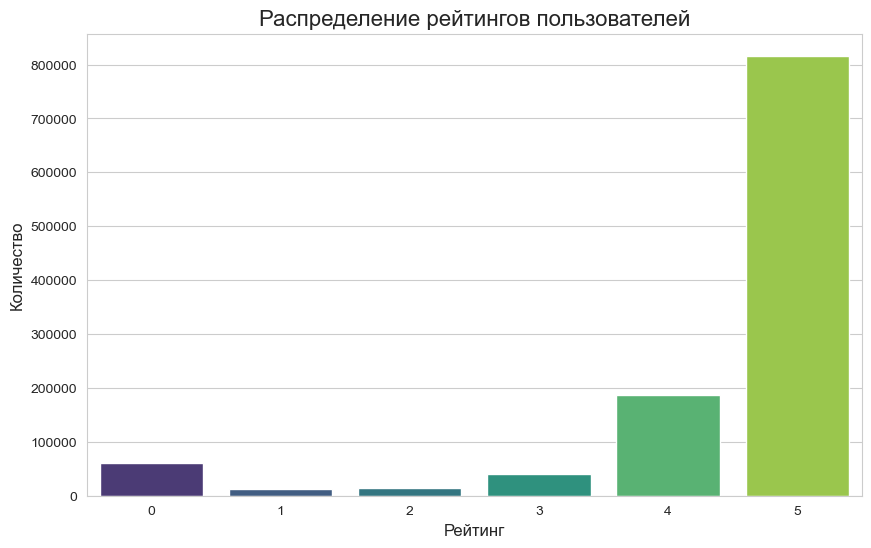

In [32]:
plt.figure(figsize=(10, 6))
sns.countplot(x='rating', data=interactions_df, palette='viridis')
plt.title('Распределение рейтингов пользователей', fontsize=16)
plt.xlabel('Рейтинг', fontsize=12)
plt.ylabel('Количество', fontsize=12)
plt.show()

И действительно данные распределено неравномерно. Одних только оценок 4 больше, чем 0, 1, 2 и 3 в совокупности

Рассмотрим также распределение количественных признаков таблицы **recipes_df**

In [ ]:
# Удалим неправдоподобное максимальное значение
recipes_df = recipes_df[recipes_df['minutes'] < 10**5]

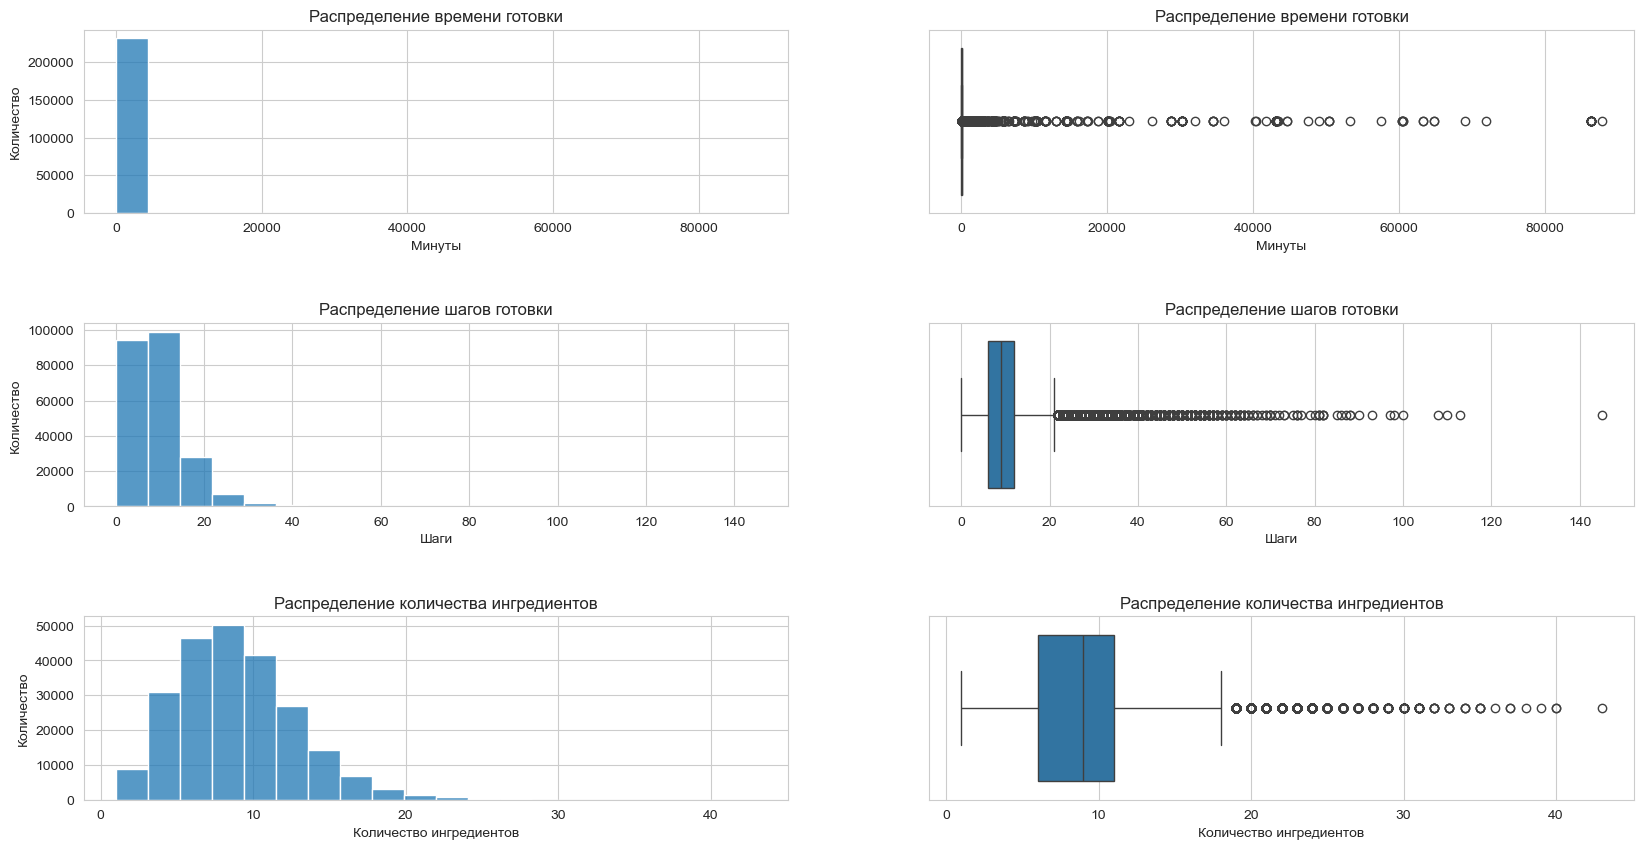

In [34]:
fig, axs = plt.subplots(3, 2, figsize=(20, 10))

sns.histplot(data=recipes_df, x='minutes', bins=20, ax=axs[0, 0])
axs[0,0].set_xlabel('Минуты')
axs[0,0].set_ylabel('Количество')
axs[0,0].set_title('Распределение времени готовки')

sns.boxplot(recipes_df['minutes'], orient='h', ax=axs[0, 1])
axs[0,1].set_xlabel('Минуты')
axs[0,1].set_title('Распределение времени готовки')

sns.histplot(data=recipes_df, x='n_steps', bins=20, ax=axs[1, 0])
axs[1,0].set_xlabel('Шаги')
axs[1,0].set_ylabel('Количество')
axs[1,0].set_title('Распределение шагов готовки')

sns.boxplot(recipes_df['n_steps'], orient='h', ax=axs[1, 1])
axs[1,1].set_xlabel('Шаги')
axs[1,1].set_title('Распределение шагов готовки')

sns.histplot(data=recipes_df, x='n_ingredients', bins=20, ax=axs[2, 0])
axs[2,0].set_xlabel('Количество ингредиентов')
axs[2,0].set_ylabel('Количество')
axs[2,0].set_title('Распределение количества ингредиентов')

sns.boxplot(recipes_df['n_ingredients'], orient='h', ax=axs[2, 1])
axs[2,1].set_xlabel('Количество ингредиентов')
axs[2,1].set_title('Распределение количества ингредиентов')

plt.subplots_adjust(wspace=0.2, hspace=0.6)
plt.show();

- Время готовки распределено далеко не равномерно, есть некоторое количество аномальных значений, которые разительно отличаются от больщинства объектов
- Распределение шагов готовки также вызывает подозрения, однако, такое количестов шагов готовки, в принципе, возможно, так что считать эти данные аномальными не будем
- Количество ингредиентов распределено нормально

Рассмотрим подробнее аномальные значения признака *minutes*

In [57]:
long_cooking_recipes_df = recipes_df[recipes_df['minutes'] > 1440]
display(long_cooking_recipes_df.head())

count_long_cooking = len(long_cooking_recipes_df)
total_recipes = len(recipes_df)
percentage = (count_long_cooking / total_recipes) * 100

print(f"Количество рецептов, готовка которых занимает больше 1 дня: {count_long_cooking}")
print(f"Это составляет: {percentage:.4f}% от всех рецептов\n")

long_cooking_recipes_df = recipes_df[recipes_df['minutes'] > 1440]

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
11,better than sex strawberries,42198,1460,41531,2002-10-03,"['weeknight', 'time-to-make', 'course', 'main-...","[734.1, 66.0, 199.0, 10.0, 10.0, 117.0, 28.0]",8,['crush vanilla wafers into fine crumbs and li...,simple but sexy. this was in my local newspape...,"['vanilla wafers', 'butter', 'powdered sugar',...",7
12,better then bush s baked beans,67547,2970,85627,2003-07-26,"['weeknight', 'time-to-make', 'course', 'main-...","[462.4, 28.0, 214.0, 69.0, 14.0, 29.0, 23.0]",9,['in a very large sauce pan cover the beans an...,i'd have to say that this is a labor of love d...,"['great northern bean', 'chicken bouillon cube...",13
50,keep it going german friendship cake,26995,14450,37305,2002-04-30,"['weeknight', 'time-to-make', 'course', 'main-...","[724.4, 38.0, 297.0, 20.0, 18.0, 31.0, 39.0]",13,['mix starter ingredients in a bowl and let st...,"yes, this sounds bizarre, but it really is tas...","['flour', 'water', 'dry yeast', 'milk', 'sugar...",17
58,marijuana vinegar,24478,20160,32692,2002-04-08,"['weeknight', 'time-to-make', 'course', 'cuisi...","[3.1, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",5,['mix the herbs and vinegar together in a jar'...,stefan and emily used to make this stuff when ...,"['fresh herbs', 'cider vinegar', 'fresh herb']",3
81,red macaroni salad,64302,1470,82367,2003-06-11,"['weeknight', 'time-to-make', 'course', 'main-...","[572.6, 43.0, 113.0, 11.0, 17.0, 18.0, 24.0]",7,"['in large mixing bowl , combine your macaroni...",this is not your usual macaroni salad....there...,"['elbow macaroni', 'green pepper', 'onion', 'c...",10


Количество рецептов, готовка которых занимает больше 1 дня: 1978
Это составляет: 0.8540% от всех рецептов



Общее количество выбросов составляет менее 1%. Возможно, пользователи просто ошиблись или намеренно ввели неправдоподобное число. Так как наша выборка достаточно большая, мы можем просто удалить эти значения.

Теперь взглянем на правдоподобность шагов готовки

In [59]:
for i in range(3):
    print(recipes_df[recipes_df['n_steps'] > 100]['steps'].iloc[i], end='\n\n')

['roast garlic: place oven rack on second notch', 'turn oven to 375 degrees f', 'cut tops off of the heads of garlic and discard excess skin', 'place garlic on a sheet of aluminum foil and drizzle 1 tsp olive oil over the tops', 'fold up edges of foil and add 2 tsp white wine to the bottom', 'seal packet tightly and place in oven', 'bake 40-45 minutes or until garlic is tender when pierced', 'open packet carefully to let cool and set aside', 'roast asparagus: turn up heat to 400 degrees f', 'holding at the end , gently bend each asparagus spear and snap off where it gives naturally', 'discard ends', 'pare leaves from stalks , leaving the', 'soak asparagus in cold water for 10 minutes', 'spray two cookie sheets with cooking spray', 'rinse asparagus twice and drain', 'blot dry with paper towels', 'place in a large bowl', 'drizzle 2 tbsp olive oil over asparagus , then sprinkle with garlic salt and pepper', 'toss to coat', 'remove asparagus , letting excess oil drip back into the bowl , a

Похоже, действительно существуют такие длинные рецепты. С данными всё в порядке

### Анализ длинного хвоста

Посмотрим, как распределяется популярность рецептов, много ли у нас хитов и малоизвестных рецептов

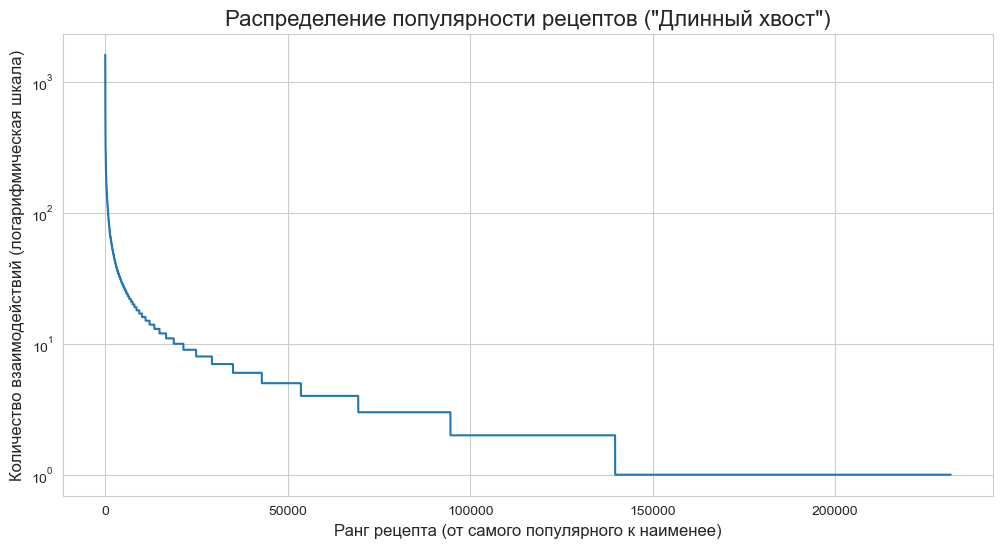

In [61]:
recipe_popularity = interactions_df['recipe_id'].value_counts()

plt.figure(figsize=(12, 6))
recipe_popularity.reset_index(drop=True).plot(logy=True)
plt.title('Распределение популярности рецептов ("Длинный хвост")', fontsize=16)
plt.xlabel('Ранг рецепта (от самого популярного к наименее)', fontsize=12)
plt.ylabel('Количество взаимодействий (логарифмическая шкала)', fontsize=12)
plt.show()

Оказывается, лишь небольшая часть рецептов получает огромное количество оценок, в то время как большинство рецептов остаются почти незамеченными

Теперь посчитаем, сколько оценок оставил каждый пользователь

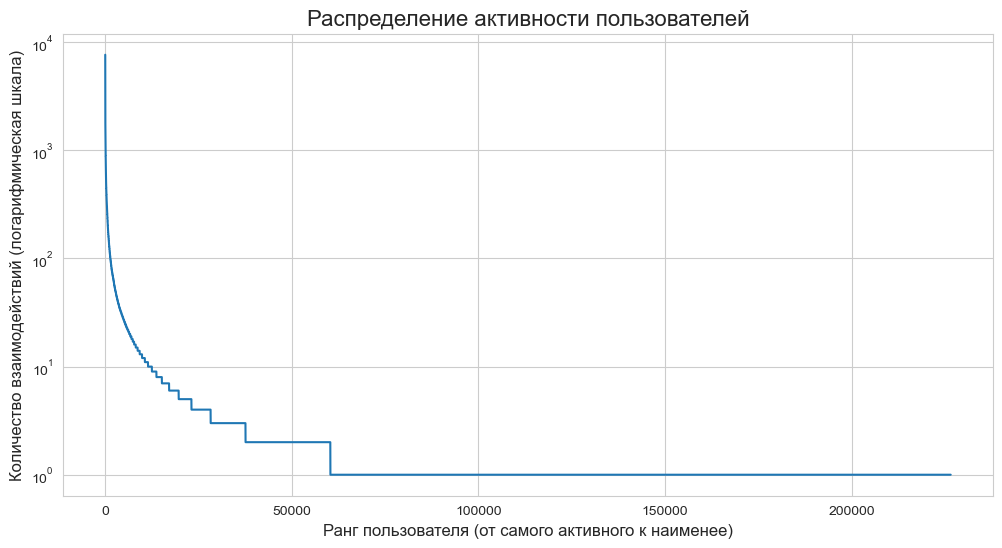

In [63]:
user_activity = interactions_df['user_id'].value_counts()

plt.figure(figsize=(12, 6))
user_activity.reset_index(drop=True).plot(logy=True)
plt.title('Распределение активности пользователей', fontsize=16)
plt.xlabel('Ранг пользователя (от самого активного к наименее)', fontsize=12)
plt.ylabel('Количество взаимодействий (логарифмическая шкала)', fontsize=12)
plt.show()

Аналогичная ситуация - очень малая часть пользователей оставила более 100 отзывов

Какие выводы можем сделать?

- Для рецептов из "хвоста", по которым нет данных о взаимодействиях, единственный способ их порекомендовать — это проанализировать их содержание (название, описание, ингредиенты, отзывы). Наша Two-Tower модель, которая будет учитывать текстовые признаки, сможет находить семантически похожие рецепты, даже если у них мало оценок.
- Работать со всем "хвостом" может быть неэффективно. Пользователи с 1-2 оценками и рецепты с 1-2 оценками вносят больше шума, чем полезного сигнала. Так что на этапе предобработки мы отфильтруем пользователей и рецепты, у которых меньше определенного порога взаимодействий (например, 5). Это позволит модели сфокусироваться на обучении на более качественных данных.

###  Расчет разреженности матрицы взаимодействий

Посмотрим, насколько плотной является наша матрица "пользователь-рецепт"

In [64]:
n_users = interactions_df['user_id'].nunique()
n_recipes = interactions_df['recipe_id'].nunique()
n_interactions = len(interactions_df)

sparsity = 1 - (n_interactions / (n_users * n_recipes))

print(f"Количество уникальных пользователей: {n_users}")
print(f"Количество уникальных рецептов: {n_recipes}")
print(f"Всего взаимодействий: {n_interactions}")
print(f"Размер полной матрицы: {n_users * n_recipes}")
print(f"Разреженность (Sparsity): {sparsity:.6f} ({sparsity*100:.4f}%)")

Количество уникальных пользователей: 226570
Количество уникальных рецептов: 231637
Всего взаимодействий: 1132367
Размер полной матрицы: 52481995090
Разреженность (Sparsity): 0.999978 (99.9978%)


У нас слишком много пустых значений в матрице. Классический DS не справится с такой задачей. Именно поэтому мы и будем в дальнейшем использовать Two-Tower модель, которая будет учить эмбеддинги для пользователей и рецептов, используя только существующие взаимодействия

### Базовый анализ текстовых данных

Посмотрим на распределение длины отзывов. Это поможет нам в будущем при работе с BERT.

In [67]:
interactions_df['review_len'] = interactions_df['review'] \
                                    .dropna() \
                                    .apply(lambda x: len(x.split()))

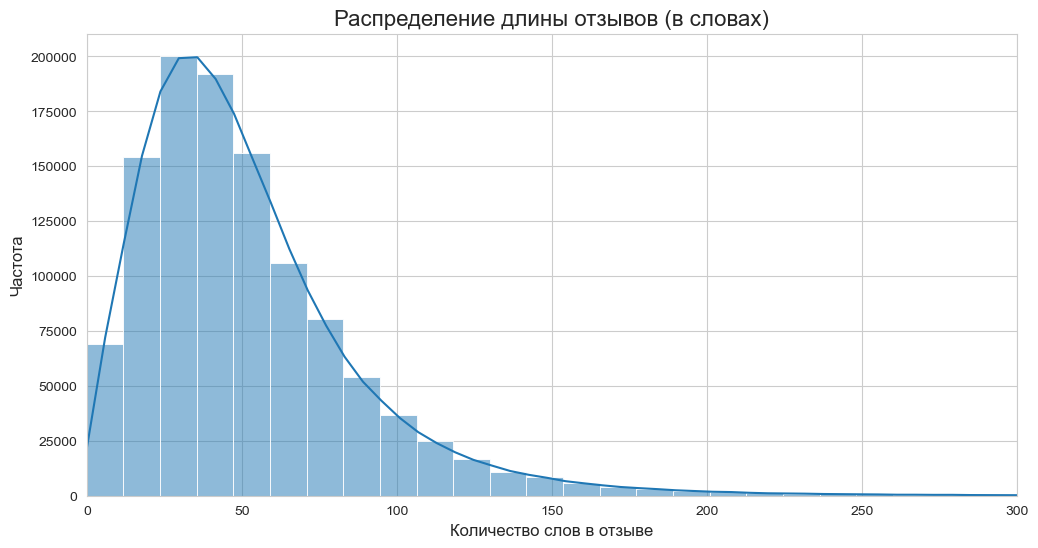

In [69]:
plt.figure(figsize=(12, 6))
sns.histplot(interactions_df['review_len'], bins=100, kde=True)
plt.xlim(0, 300) 
plt.title('Распределение длины отзывов (в словах)', fontsize=16)
plt.xlabel('Количество слов в отзыве', fontsize=12)
plt.ylabel('Частота', fontsize=12)
plt.show()

Большинство отзывов не превышает 100 слов, длинных как и коротких довольно мало.

**Подведем итоги того, что мы узнали:**

- Данные большие и очень разреженные (99.9978%), что оправдывает использование DL-моделей.
- Рейтинги сильно смещены в позитив, что дает нам много хороших примеров для обучения.
- Есть явные проблемы с качеством данных (аномалии в minutes), которые мы должны исправить.
- Существует ярко выраженный "длинный хвост" как для рецептов, так и для пользователей, что делает гибридный (контентный) подход необходимостью.
- Текстовые данные (отзывы) достаточно богатые и информативные, и мы знаем, как их эффективно обрабатывать с помощью BERT.

In [36]:
recipes_df.head()

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8


## Реализация класса Dataset

In [37]:
class FoodRecipeDataset(Dataset):
    """
    PyTorch Dataset для загрузки данных о взаимодействиях пользователей и рецептов.
    Отдает только позитивные взаимодействия (рейтинг >= 4).
    """

    def __init__(self, interactions_path, users_path, recipes_path):
        super().__init__()

        print('Загрузка и обработка данных...')

        self.interactions_df = pd.read_csv(interactions_path)
        # Фильтрация позитивных взаимодействий
        self.interactions_df = self.interactions_df[self.interactions_df['rating'] >= 4].reset_index(drop=True)
        print(f"Найдено {len(self.interactions_df)} позитивных взаимодействий.")

        users_df = pd.read_csv(users_path)
        recipes_df = pd.read_csv(recipes_path)

        # ID в 'u' и 'i' уже смаплены в непрерывные последовательности от 0
        self.n_users = users_df['u'].nunique()
        self.n_recipes = recipes_df['i'].nunique()
        
        print(f"Общее число пользователей: {self.n_users}")
        print(f"Общее число рецептов: {self.n_recipes}")

        self.users_ids = torch.tensor(self.interactions_df['u'].values, dtype=torch.long)
        self.recipe_ids = torch.tensor(self.interactions_df['i'].values, dtype=torch.long)

    def __len__(self):
        """Возвращает общее количество позитивных взаимодействий."""
        return len(self.interactions_df)
    
    def __getitem__(self, idx):
        """Возвращает одну пару (user_id, recipe_id) по индексу."""
        return self.users_ids[idx], self.recipe_ids[idx]


Протестируем наш Dataset и Dataloader

In [38]:
train_dataset = FoodRecipeDataset(
    interactions_path=INTERACTIONS_TRAIN_PATH,
    users_path=USERS_PATH,
    recipes_path=RECIPES_PATH
)

train_loader = DataLoader(
    dataset=train_dataset,
    batch_size=1024,
    shuffle=True,
    num_workers=0
)

Загрузка и обработка данных...
Найдено 645970 позитивных взаимодействий.
Общее число пользователей: 25076
Общее число рецептов: 178265


In [39]:
# Проверим, как выглядит один батч данных
print("\n--- Пример одного батча ---")
sample_users, sample_recipes = next(iter(train_loader))

print(f"Форма батча пользователей: {sample_users.shape}") # torch.Size([1024])
print(f"Форма батча рецептов: {sample_recipes.shape}") # torch.Size([1024])
print(f"Пример ID пользователя из батча: {sample_users[0]}")
print(f"Пример ID рецепта из батча: {sample_recipes[0]}")


--- Пример одного батча ---
Форма батча пользователей: torch.Size([1024])
Форма батча рецептов: torch.Size([1024])
Пример ID пользователя из батча: 296
Пример ID рецепта из батча: 158328
